In [1]:
import numpy as np
import cv2
from readlif.reader import LifFile
import matplotlib.pyplot as plt
from PIL import Image

from skimage.segmentation import watershed
from skimage.feature import peak_local_max
import os
from time import sleep
from tqdm import tqdm

In [37]:
def norm_func(x):
    return cv2.normalize(x, None, 0, 255, cv2.NORM_MINMAX)

def exp_dims(x):
    return np.expand_dims(x, axis = 0)

clahe = cv2.createCLAHE(clipLimit=2, tileGridSize = (32,32))

def item_move(a,b,c):
    for cc in c:
        if (cc in b) and (cc not in a):
            a.append(cc)
            b.remove(cc)
        elif (cc in a) and (cc not in b):
            b.append(cc)
            a.remove(cc)
    return a,b
def remove_close_coords(coords, min_distance = 8):
    ignore = []
    for i in range(coords.shape[0] - 1):
        if i in ignore:
            continue
        for j in range(i+1, coords.shape[0]):
            codis = ((coords[i] - coords[j])**2).sum()
            if codis < min_distance**2:
                ignore.append(j)
    remain = list(range(coords.shape[0]))
    for item in ignore:
        if item in remain:
            remain.remove(item)
    return coords[remain]

In [3]:
namelist = [
    "original_image_from_microscopy.lif",
]
top = "Folder/path"

lifimage = LifFile(os.path.join(top, namelist["select_file"]))

print(lifimage.num_images)

159


In [1]:
if index is None:
    index = 0
else:
    index += 1

img = lifimage.get_image(index)
print(index,":",img.path, img.name)
for k in img.info.keys():
    print(k,":",img.info[k])

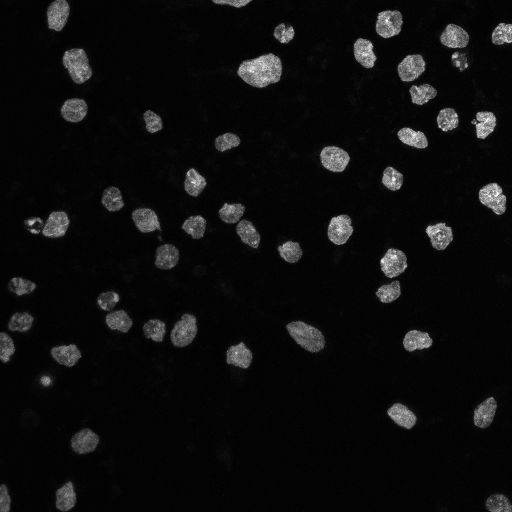

In [651]:
fr_list = []
for i in range(5,18):
    f = np.array(img.get_frame(c=0, z=i))
    f = cv2.normalize(f, None, 0, 255, cv2.NORM_MINMAX)
    fr_list.append(f)
fr = np.array(fr_list)
frm = np.max(fr, axis = 0)
Image.fromarray(frm)

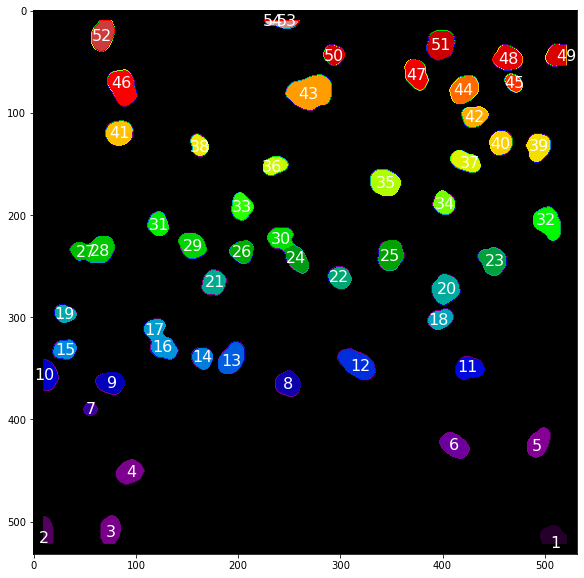

In [652]:
frmd = clahe.apply(frm)
for i in range(16):
    if i < 4:
        frmd = cv2.GaussianBlur(frmd, (3,3), 0)
    else:
        frmd = cv2.medianBlur(frmd, 5)

ret, th = cv2.threshold(frmd, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

dist_transform = cv2.distanceTransform(th,cv2.DIST_L2,5)

coords = peak_local_max(dist_transform, min_distance = 8, exclude_border=False, footprint=np.ones((8, 8)))
coords = remove_close_coords(coords,12)

markers = np.zeros_like(dist_transform).astype(np.int32)
for i in range(len(coords)):
    markers[tuple(coords[i].T)] = i+1
    
labels = watershed(-dist_transform, markers, mask=th)

plt.figure(figsize= (10,10))
showlabels = np.zeros((labels.shape[0]+20,labels.shape[1]+20)).astype(np.int32)
showlabels[10:-10, 10:-10] = labels
plt.imshow(showlabels, cmap=plt.cm.nipy_spectral)
for i in range(len(coords)):
    plt.text(coords[i, 1]+10, coords[i, 0]+10, '{}'.format(i+1),color = "w", fontsize=16,verticalalignment = 'center',horizontalalignment='center')
plt.show()

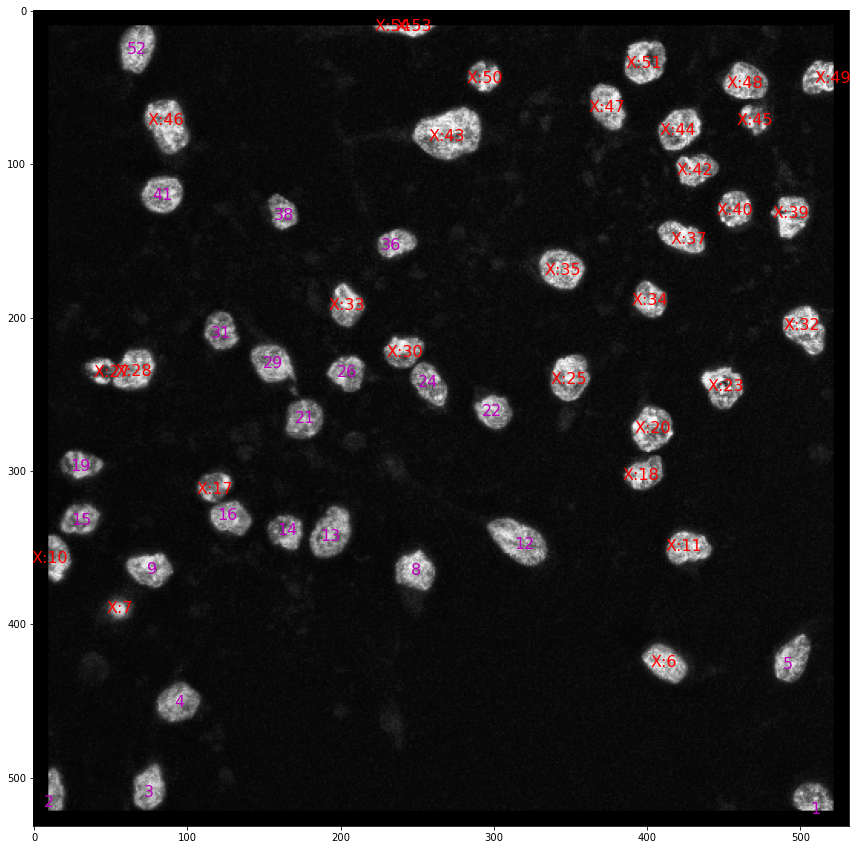

In [653]:
mask_list = []
for i in range(len(coords)):
    m = (labels == (i+1))
    mask_list.append(m)
mask = np.array(mask_list)

sd = []
for i in range(len(coords)):
    
    im = (clahe.apply(frm)).astype(np.float32)[mask[i]]
#     im = frm.astype(np.float32)[mask[i]]

    stdiv = im.std()

    sd.append(stdiv)

nsd = np.array(sd)

sidx = np.argsort(nsd)
snsd = nsd[sidx]
new = 0
for i in range(1, len(snsd)-1):
    pre = snsd[:i]
    post = snsd[i:]
    result = i * (len(snsd)-i) * (pre.mean() - post.mean())**2 / (len(snsd)**2)
#     print(result)
    if result < new:
        index_sd = i-1
        break
    else:
        new = result
if i != len(snsd)-2:
    threshold_sd = snsd[index_sd]
    label1_sd = np.where(nsd >= threshold_sd)[0] + 1
    label2_sd = np.where(nsd < threshold_sd)[0] + 1
else:
    print("Attention")
    label1_sd = []
    label2_sd = list(range(1, len(coords)+1))

mid = clahe.apply(fr[6])

plt.figure(figsize= (15,15))
showlabels = np.zeros((mid.shape[0]+20,mid.shape[1]+20)).astype(np.uint8)
showlabels[10:-10, 10:-10] = clahe.apply(frm)#mid#clahe.apply(fr[6])#clahe.apply(frm)
plt.imshow(showlabels, cmap="gray")#plt.cm.nipy_spectral)
for i in range(len(coords)):
    if (i+1) in label1_sd:
        tt = "X:{}".format(i+1)
        cc = "r"
    else:
        tt = "{}".format(i+1)
        cc = "m"
    plt.text(coords[i, 1]+10, coords[i, 0]+10, tt,color = cc, fontsize=16,verticalalignment = 'center',horizontalalignment='center')
plt.show()

In [657]:
correct_list = [...]

[]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]


[45, 27, 17]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54]


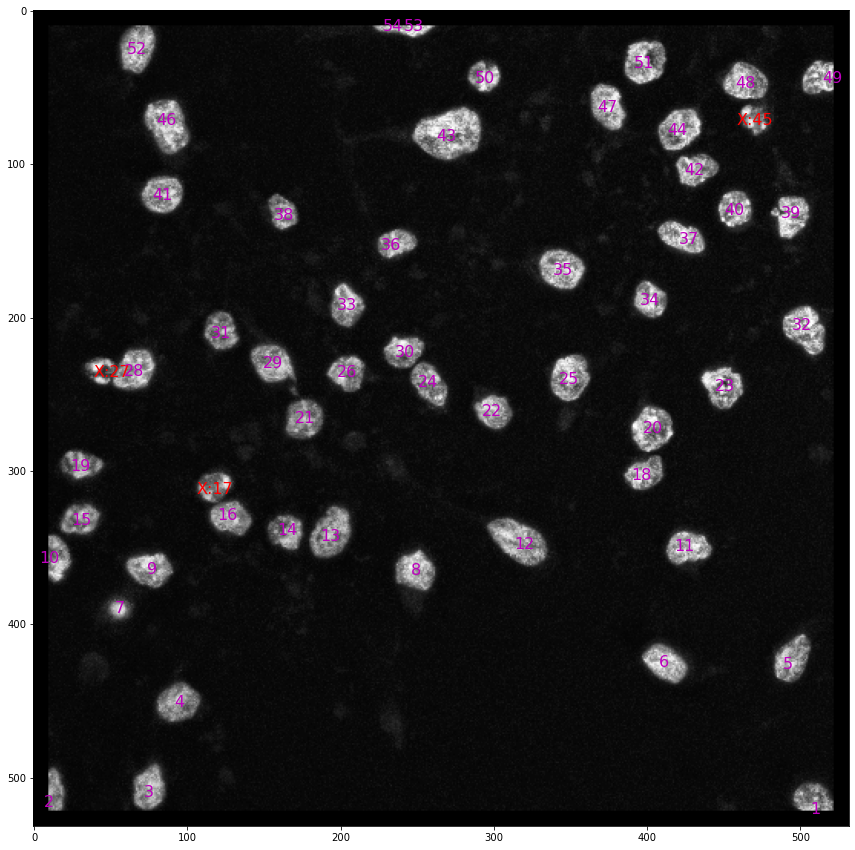

In [658]:
print(list(label1_sd))
print(list(label2_sd))
label1_sd, label2_sd = item_move(list(label1_sd), list(label2_sd), correct_list)
correct_list = None
print("\n")
print(label1_sd)
print(label2_sd)

plt.figure(figsize= (15,15))
showlabels = np.zeros((frm.shape[0]+20,frm.shape[1]+20)).astype(np.uint8)
showlabels[10:-10, 10:-10] = clahe.apply(frm)
plt.imshow(showlabels, cmap="gray")#plt.cm.nipy_spectral)
for i in range(len(coords)):
    if (i+1) in label1_sd:
        tt = "X:{}".format(i+1)
        cc = "r"
    else:
        tt = "{}".format(i+1)
        cc = "m"
    plt.text(coords[i, 1]+10, coords[i, 0]+10, tt,color = cc, fontsize=16,verticalalignment = 'center',horizontalalignment='center')
plt.show()

In [659]:
mask_1 = np.zeros((th.shape[0], th.shape[1]), np.float32)
mask_2 = np.zeros((th.shape[0], th.shape[1]), np.float32)
for t in label1_sd:
    m = labels == t
    mask_1[m] = 1
for t in label2_sd:
    m = labels == t
    mask_2[m] = 1
    
# showfr = np.hstack(((mask_1*255).astype(np.uint8), frm, (mask_2*255).astype(np.uint8)))
# Image.fromarray(showfr)

bf_list = []
for i in range(5,18):
    b = np.array(img.get_frame(c=1, z=i))
    b = cv2.normalize(b, None, 0, 255, cv2.NORM_MINMAX)
    bf_list.append(b)
brightfield = np.array(bf_list)

wmask = th.astype(np.float32) / 255
fluorescent_0 = (mid * wmask).astype(np.uint8)

fluorescent_1 = exp_dims((mid * mask_1)).astype(np.uint8)
fluorescent_2 = exp_dims((mid * mask_2)).astype(np.uint8)

smask_1 = exp_dims(mask_1).astype(np.uint8)
smask_2 = exp_dims(mask_2).astype(np.uint8)

fluorescent = np.concatenate((fluorescent_2,fluorescent_1), axis = 0)
smask = np.concatenate((smask_2, smask_1), axis = 0)

tn = img.path[42:]
name = tn[: tn.index("/")].replace(' ', '_')
name = name + "_{}".format(index)
print(name)

 

6_hr_cs3_z_128


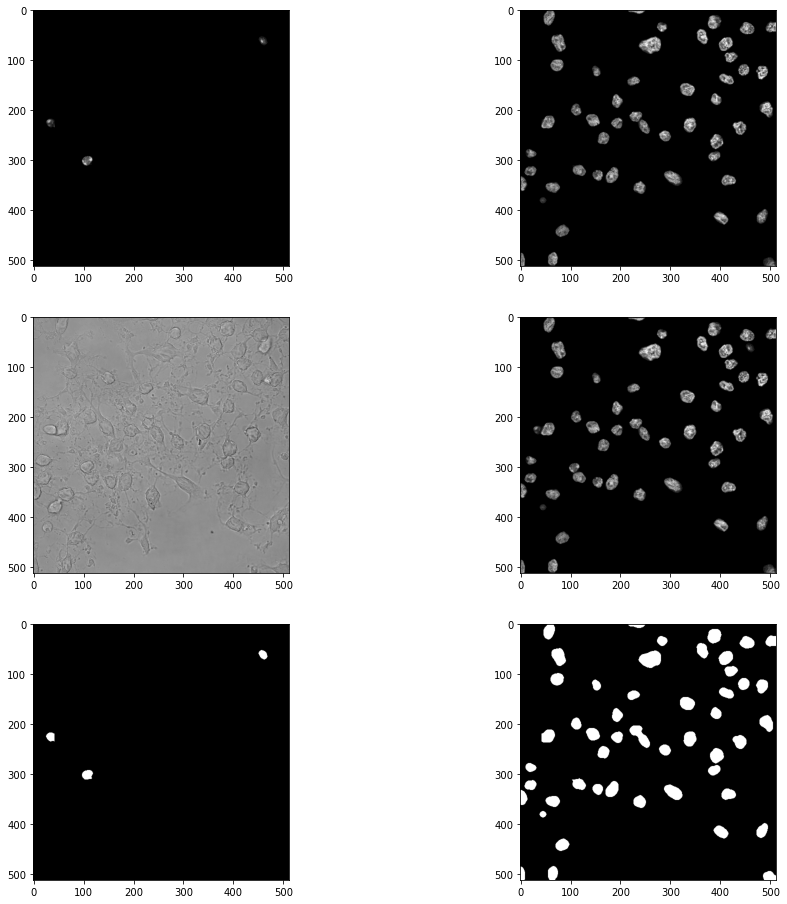

In [660]:
plt.figure(figsize = (16,16))
plt.subplot(3,2,1)
plt.imshow(fluorescent[1], cmap="gray")
plt.subplot(3,2,2)
plt.imshow(fluorescent[0], cmap="gray")
plt.subplot(3,2,3)
plt.imshow(brightfield[6], cmap="gray")
plt.subplot(3,2,4)
plt.imshow(fluorescent_0, cmap="gray")
plt.subplot(3,2,5)
plt.imshow(smask[1], cmap="gray")
plt.subplot(3,2,6)
plt.imshow(smask[0], cmap="gray")
plt.show()
# Image.fromarray(tt[1])

In [661]:
path = os.path.join("DBCellfolder_latest", name)
if not os.path.isdir(path):
    os.mkdir(path)

bf_path = os.path.join(path, "{}_brightfiled.npy".format(name))
np.save(bf_path, brightfield)
print(bf_path)

f1_path = os.path.join(path, "{}_fluorescent_1.npy".format(name))
np.save(f1_path, fluorescent_0)
print(f1_path)

f2_path = os.path.join(path, "{}_fluorescent_2.npy".format(name))
np.save(f2_path, fluorescent)
print(f2_path)

mask_path = os.path.join(path, "{}_mask.npy".format(name))
np.save(mask_path, smask)
print(mask_path)

# for i in tqdm(range(0,3)):
#     sleep(1)  

DBCellfolder_latest\6_hr_cs3_z_128\6_hr_cs3_z_128_brightfiled.npy
DBCellfolder_latest\6_hr_cs3_z_128\6_hr_cs3_z_128_fluorescent_1.npy
DBCellfolder_latest\6_hr_cs3_z_128\6_hr_cs3_z_128_fluorescent_2.npy
DBCellfolder_latest\6_hr_cs3_z_128\6_hr_cs3_z_128_mask.npy
